In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

In [3]:
df = pd.read_csv(url, sep=';', error_bad_lines=False)

In [4]:
#velger følgende features:  Kommune, Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra, 
#                          Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra, Kjøretøy_Kapasitet, Passasjerer_Ombord

In [5]:
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5


In [6]:
df = df.drop(["TurId", "Dato", "Fylke", "Område", "Holdeplass_Fra", "Holdeplass_Til", "Linjetype", "Linjefylke", "Linjenavn", "Linjeretning", "Tidspunkt_Faktisk_Avgang_Holdeplass_Fra", "Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"], axis=1)

In [7]:
df.head()

,Kommune,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,Bærum,10:53:53,10:53:00,112,5
1,Bærum,13:12:20,13:12:00,112,5
2,Bærum,10:18:56,10:19:00,112,6
3,Bærum,13:52:04,13:51:00,112,10
4,Bærum,07:34:13,07:33:00,112,10


In [8]:
df.isna().sum()

Kommune                                      0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     0
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    0
Kjøretøy_Kapasitet                           0
Passasjerer_Ombord                           0
dtype: int64

In [9]:
df["Kommune"].value_counts()

Lillestrøm           1094
Bærum                 724
Lørenskog             525
Ullensaker            358
Asker                 326
Nittedal              274
Gamle Oslo            262
Rælingen              248
Nannestad             236
Alna                  210
Bjerke                199
Enebakk               153
Eidsvoll              144
Stovner               125
Vestre Aker           121
Nes                   117
Grünerløkka           110
Gjerdrum               97
Aurskog-Høland         97
Nordstrand             89
Ullern                 85
Grorud                 77
Sentrum                77
St.Hanshaugen          47
Sagene                 43
Frogner                33
Søndre Nordstrand      30
Nordre Follo           19
Indre Østfold          18
Nordre Aker            18
Lier                   15
Nordmarka              12
Hurdal                 11
Drammen                 6
Name: Kommune, dtype: int64

In [10]:
df["Kjøretøy_Kapasitet"].value_counts()

106    1805
112     791
151     690
115     492
105     475
80      452
72      398
130     205
71      193
69      174
75       89
33       68
77       45
76       45
47       39
70       34
103       4
102       1
Name: Kjøretøy_Kapasitet, dtype: int64

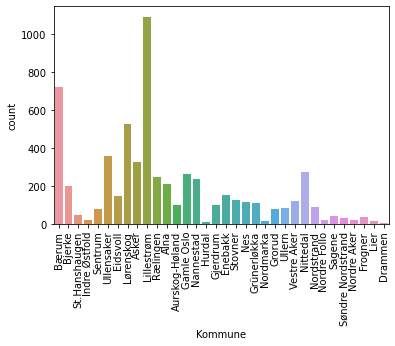

In [11]:
sns.countplot(x='Kommune', data=df);
plt.xticks(rotation=90);

In [12]:
from datetime import datetime
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce')
df['forsinkelse'] = df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"]-df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"]

In [13]:
df

,Kommune,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,forsinkelse
0,Bærum,2021-09-27 10:53:53,2021-09-27 10:53:00,112,5,0 days 00:00:53
1,Bærum,2021-09-27 13:12:20,2021-09-27 13:12:00,112,5,0 days 00:00:20
2,Bærum,2021-09-27 10:18:56,2021-09-27 10:19:00,112,6,-1 days +23:59:56
3,Bærum,2021-09-27 13:52:04,2021-09-27 13:51:00,112,10,0 days 00:01:04
4,Bærum,2021-09-27 07:34:13,2021-09-27 07:33:00,112,10,0 days 00:01:13
...,...,...,...,...,...,...
5995,Lillestrøm,2021-09-27 16:23:18,2021-09-27 16:10:00,151,2,0 days 00:13:18
5996,Lillestrøm,2021-09-27 06:00:32,2021-09-27 05:59:00,151,2,0 days 00:01:32
5997,Sagene,2021-09-27 17:42:43,2021-09-27 17:32:00,106,3,0 days 00:10:43
5998,Gamle Oslo,2021-09-27 06:00:11,2021-09-27 05:59:00,151,5,0 days 00:01:11


In [14]:
df.head()

,Kommune,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,forsinkelse
0,Bærum,2021-09-27 10:53:53,2021-09-27 10:53:00,112,5,0 days 00:00:53
1,Bærum,2021-09-27 13:12:20,2021-09-27 13:12:00,112,5,0 days 00:00:20
2,Bærum,2021-09-27 10:18:56,2021-09-27 10:19:00,112,6,-1 days +23:59:56
3,Bærum,2021-09-27 13:52:04,2021-09-27 13:51:00,112,10,0 days 00:01:04
4,Bærum,2021-09-27 07:34:13,2021-09-27 07:33:00,112,10,0 days 00:01:13


In [15]:
df['forsinkelse'].describe()

count                         5775
mean     0 days 00:01:33.185800865
std      0 days 00:05:29.733101974
min              -1 days +23:16:55
25%                0 days 00:00:30
50%                0 days 00:01:25
75%                0 days 00:02:39
max                0 days 02:33:31
Name: forsinkelse, dtype: object

In [17]:
df['prosent_opptatt'] = (100* df['Passasjerer_Ombord']) / df['Kjøretøy_Kapasitet']

In [18]:
df['prosent_opptatt'].describe()

count    6000.000000
mean        4.396286
std         6.825213
min       -34.821429
25%         0.000000
50%         2.830189
75%         7.142857
max        80.000000
Name: prosent_opptatt, dtype: float64

<AxesSubplot:>

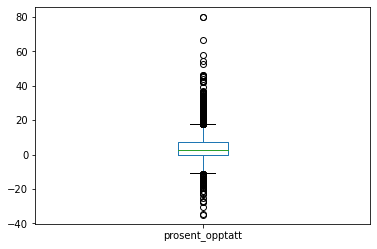

In [19]:
df['prosent_opptatt'].plot.box()